# Introduction

Please fill in the code to complete the assignment, and submit the whole package to Web Learning as zip file. 






# First steps

Run the following code to import the modules that you'll need. You are welcome to modify this code (e.g. by importing more modules).

In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images
import numpy as np
from numpy import array, zeros, arange, exp, random, ones_like, zeros_like,ones
from scipy.fftpack import dct
from scipy.fftpack import idct
from scipy.signal import convolve,convolve2d,correlate2d,correlate
from imageio import imread
import itertools,math
import matplotlib.pyplot as plt
import unittest
from PIL import  Image

# Problem 1: Bit plane

Pixel values are integers composed of bits. For example, values in a 256-level gray scale image are composed of 8 bits (one byte). As bit_1 illustrates, an 8-bit image may be considered as being composed of eight one-bit planes, with plane 1 containing the lowest-order bit of all pixels in the image, and plane 8 all the highest-order bits.

![bit_1.png](./bit_1.png)

Figure bit_2 shows an 8-bit grayscale image and its eight one-bit planes.


![bit_2.png](./bit_2.png)

Now you have a 256-level gray scale image, and please wirte a function bit plane(image,bits) that return the plane image(Please do not use any “black-box” functions for this). (2 points)

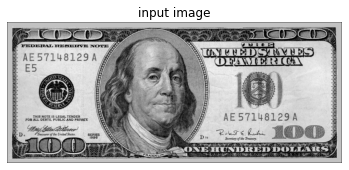

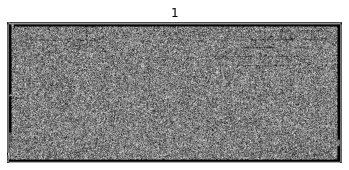

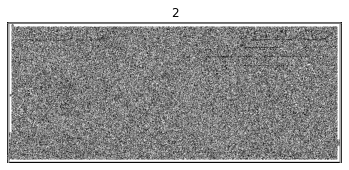

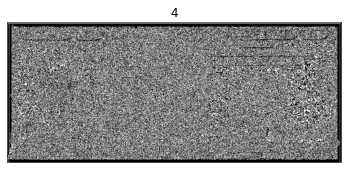

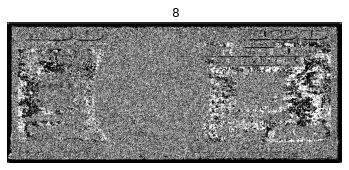

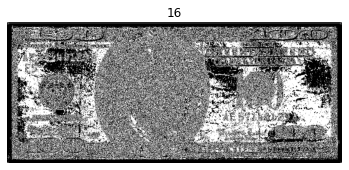

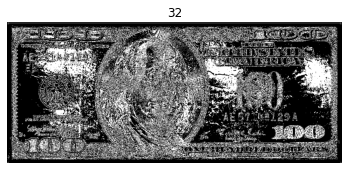

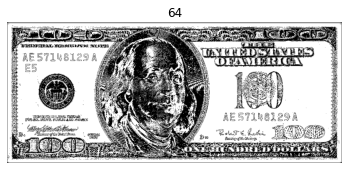

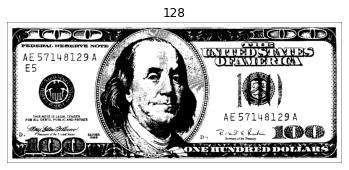

In [6]:
image=imread('./doller_l.jpg')
image = np.array(image, np.uint8)
plt.figure()
plt.title("input image")
plt.axis('off')
plt.imshow(image,cmap=plt.cm.gray)

def bit_plane(image,bits):
    #############your code###################
    return image & bits
    #########################################
    

def show_gray(image,bits):
    mask = image > 0
    new_image = np.copy(image)
    new_image[mask] = 255
    plt.figure()
    plt.title(str(bits))
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray)

for i in range(8):
    bits = 2**i
    image_new = bit_plane(image,bits)
    show_gray(image_new,bits)



# Problem 2.1: Edge detection 

Using the starter code provided, apply the horizontal and vertical gradient filters $[1, -1]$
and $[1, −1]^T$ to the picture of the provided pet, producing filter responses $I_x$ and $I_y$. 

Write a
function convolve(im, h) that takes a grayscale image and a 2D filter as input, and returns
the result after convolution. (2 points)

 Please do not use any “black-box” filtering functions for this
(such as the ones in scipy). Instead, implement the convolution as a series of nested for loops
(you may also use numpy.dot, but it is not necessary). Compute the total edge strength as
$I_x^2$ + $I_y^2$
, and visualize it using matplotlib, following the sample code. Create visualizations
of $I_x$, $I_y$, and the combined response, following the sample code.

Please handle out-of-bounds pixels in the image by assuming that they are 0. Also please
make sure to implement convolution, not cross-correlation. Note that this simple filtering
method will have a fairly high error rate — there will be true object boundaries it misses and
spurious edges that it erroneously detects

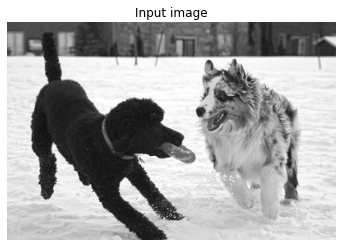

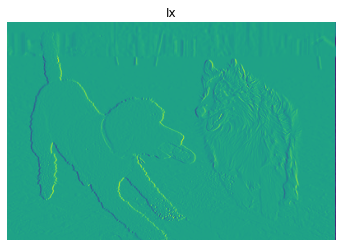

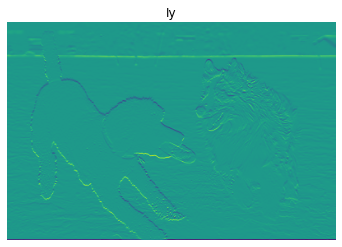

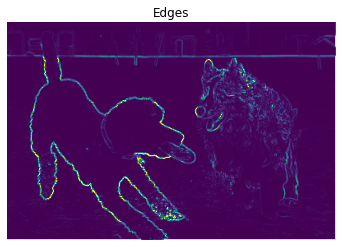

In [10]:
# You can upload images yourself or load them from URLs
im = imageio.imread('dog-1.jpg')
# Convert to grayscale. We'll use floats in [0, 1].
im = im.mean(2)/255.

#Generate gradient filters
dx = np.array([[1, -1]])
dy = np.array([[1], [-1]])


#convolove function
def convolve(im, h):
  
  im_L,im_W = im.shape
  h = np.flipud(np.fliplr(h))
  res = np.zeros_like(im)
  im_pad = np.zeros((im_L + 2, im_W + 2))
  im_pad[1:-1, 1:-1] = im
  for m in range(im_L):
    for n in range(im_W):
      for k in range(h.shape[0]):
        for l in range(h.shape[1]):
          #############your code###################
          res[m, n] += h[k, l] * im_pad[m + 1 + k , n + 1 + l]
          ######################################### 
  
  return res
       

# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix)

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy)

plt.figure()
plt.title('Edges')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))


# Problem 2.2: Edge detection (b)
It appears that the gradient filter is firing on small, spurious edges.

We can address the problem by creating an edge detector that only responds to larger-scale edges. Do this by first blurring the image with a Gaussian filter, before computing
gradients. Implement both the Gaussian filter and the gradient filter using a black-box convolution function scipy.ndimage.convolve, rather than your hand-crafted solution.

Please visualize the images and edges with matplotlib, using code similar to what we provided in (a).

(i) Compute the edges without blurring, so we can look at the before-and-after results.

(ii) Compute the blurred image using $\sigma=2$ and an $11 \times 11$ filter. (2 points)

(iii) Instead of blurring the image with a Gaussian filter, use a box filter (i.e., set each of the $11 \times 11$ filter values to $\left.1 / 11^{2}\right)$  (2 points)

(iv) Compute edges on the two blurred images.  (2 points)

(v) Do you see artifacts in the box-filtered result? Describe how the two results differ. Include your written response in the notebook.  (2 points)

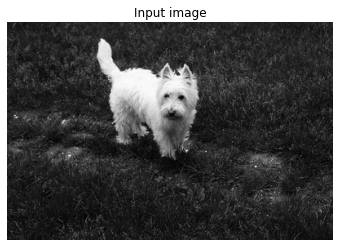

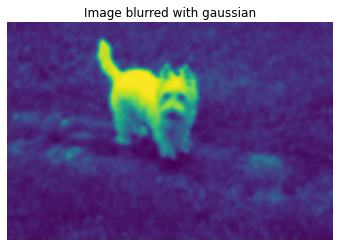

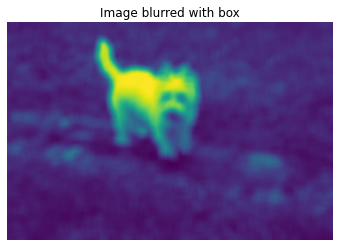

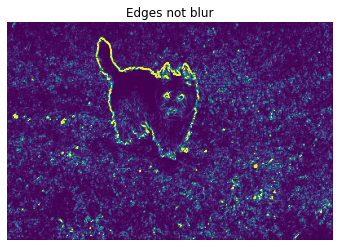

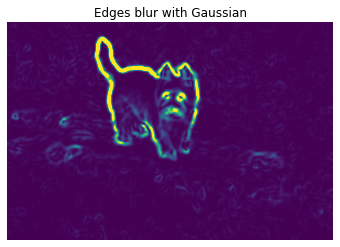

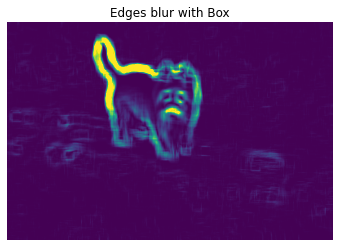

In [15]:
im = imageio.imread('dog-2.jpg').mean(2)/255.

# Convolve the image with horizontal and vertical gradient filters
Ix_before = scipy.ndimage.convolve(im, dx)
Iy_before = scipy.ndimage.convolve(im, dy)
edges_before = Ix_before**2. + Iy_before**2.


# Generate Gaussian filter 
def gauss(size, sigma):
    
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    #############your code###################
    g = np.zeros((size, size))
    center = (size - 1) // 2
    for i in range(size):
        for j in range(size):
            g[i, j] = math.exp(-((i - center)**2 + (j - center)**2) / (2 * sigma**2))
    #########################################
    return g/g.sum()
    
gaussian = gauss(11, 2)

# Generate Box filter
#############your code###################
box = np.full((11, 11), 1/(11**2)) # replace None with your code
#########################################


# Generate two blur images
im_blur_gaussian = scipy.ndimage.convolve(im, gaussian)
im_blur_box =  scipy.ndimage.convolve(im, box)

# Convolve two blur images with horizontal and vertical gradient filters 
#############your code###################
Ix_g = scipy.ndimage.convolve(im_blur_gaussian, dx) # replace None with your code
Iy_g = scipy.ndimage.convolve(im_blur_gaussian, dy) # replace None with your code
edges_after_blur_gaussion = Ix_g**2. + Iy_g**2.

Ix_b = scipy.ndimage.convolve(im_blur_box, dx) # replace None with your code
Iy_b = scipy.ndimage.convolve(im_blur_box, dy) # replace None with your code
edges_after_blur_box = Ix_b**2. + Iy_b**2.
#########################################
 
# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.title('Image blurred with gaussian')
plt.axis('off')
plt.imshow(im_blur_gaussian)

plt.figure()
plt.title('Image blurred with box')
plt.axis('off')
plt.imshow(im_blur_box)

plt.figure()
plt.title('Edges not blur')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges_before, vmin = 0., vmax = np.percentile(edges_before, 99))

plt.figure()
plt.title('Edges blur with Gaussian')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges_after_blur_gaussion, vmin = 0., vmax = np.percentile(edges_after_blur_gaussion, 99))

plt.figure()
plt.title('Edges blur with Box')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges_after_blur_box, vmin = 0., vmax = np.percentile(edges_after_blur_box, 99))


#your response for (v):
* The edges in box-filtered result are wider than edges in Guassian-filtered result.
* Box-filtered result failed to detect some edges, such as the face and the feet, while the Guassian-filtered result did well in these edges.

# Problem 2.3: Pet edge detection (c)
Instead of convolving the image with two filters to compute $I_x$ (i.e. a Gaussian blur followed
by a gradient), create a single filter that yields the same response. Visualize the filter using
the provided code .(2 points)

Please use the visualization code to display the filter you construct.

0.0005357777064101212


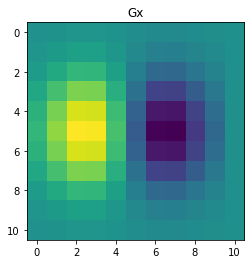

In [26]:
# Generate new filter using associative rule
#############your code###################
Gx = scipy.ndimage.convolve(gaussian, dx) # replace None with your code
#########################################
# Compare response with Ix that from dx and gaussian and print error
Ix_Gx = scipy.ndimage.convolve(im, Gx)
print(np.abs(Ix_Gx - Ix_g).mean())


#show new filter Gx
plt.figure()
plt.title('Gx')
plt.imshow(Gx)


# Problem 2.4 Edge detection (d)

Write a function oriented_grad $\left(I_{x}, I_{y}, \theta\right)$ that returns the image gradient in the direction $\theta$ given the horizontal and vertical gradients. (2 points)

Use this function to compute gradients for the provided sample image at $\theta \in\left\{\frac{1}{4} \pi, \frac{1}{2} \pi, \frac{3}{4} \pi\right\} .$ Compute your gradients on a blurred version of the input image, using the same blur kernel as (b). Visualize these results in the same manner as Problem 2.1 (a) .

Please visualize the results using matplotlib.

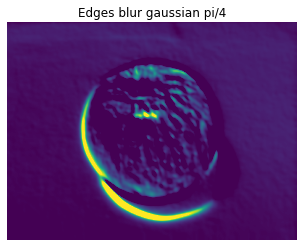

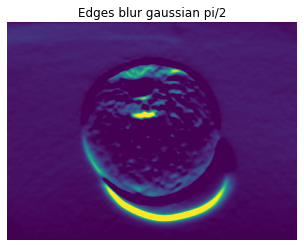

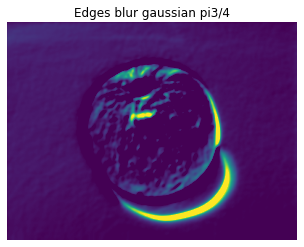

In [30]:
im_apple = imageio.imread('apple.jpg').mean(2)/255.


#Generate blur image using gaussian
im_blur_gaussian = scipy.ndimage.convolve(im_apple, gaussian)

#Generate Ix and Iy 
Ix = scipy.ndimage.convolve(im_blur_gaussian, dx)
Iy = scipy.ndimage.convolve(im_blur_gaussian, dy)

#function 

def oriented_grad(Ix, Iy, angle):
  #############your code###################
  return Ix * math.cos(np.pi - angle) + Iy * math.sin(np.pi - angle)
  ########################################

#different angle
I_angle_1 = oriented_grad(Ix, Iy, np.pi / 2)
I_angle_2 = oriented_grad(Ix, Iy, np.pi / 4)
I_angle_3 = oriented_grad(Ix, Iy, np.pi * 3 / 4)


plt.figure()
plt.title('Edges blur gaussian pi/4')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(I_angle_2, vmin = 0., vmax = np.percentile(I_angle_2, 99))

plt.figure()
plt.title('Edges blur gaussian pi/2')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(I_angle_1, vmin = 0., vmax = np.percentile(I_angle_1, 99))

plt.figure()
plt.title('Edges blur gaussian pi3/4')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(I_angle_3, vmin = 0., vmax = np.percentile(I_angle_3, 99))

# Problem 3.1  FFT 

We know that the Fourier transform can convert an image into the frequency domain, and numpy provides related functions to help us to do the Fourier transform.

(<AxesSubplot:title={'center':'center'}>,
 Text(0.5, 1.0, 'center'))

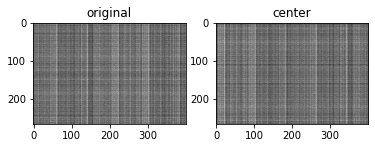

In [31]:
image = imageio.imread('dog-1.jpg').mean(2)/255.
image = np.array(image, np.uint8)

# fft
f = np.fft.fft2(image)

# this shift convert the low frequency part to the center of the image, it is for visualization
fshift = np.fft.fftshift(f)
#Take the absolute value: change the complex number into a real number
#The purpose of taking the logarithm is to change the data to a smaller range (such as 0-255)
s1 = np.log(np.abs(f))
s2 = np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(s1,'gray'),plt.title('original')
plt.subplot(122),plt.imshow(s2,'gray'),plt.title('center')


We know that after the image is transformed and the moving center, from the middle to the outside, the frequency is from low frequency to high frequency. So if we remove a small part of the middle regulation, is it relative to removing the low frequency signal? This is equivalent to high-pass filtering. This filter template may be drawn like this:

![highpass.jp](./highpass.jpg)

Black part is 0 and white part is 1. High-pass filtering is achieved by multiplying (multiplying) this template with the frequency domain matrix of the Fourier transform of the image. For example, the following:

(265, 400)


(<AxesSubplot:title={'center':'Highpass'}>,
 Text(0.5, 1.0, 'Highpass'))

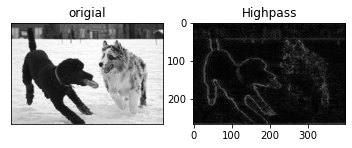

In [32]:
image = imageio.imread('dog-1.jpg').mean(2)/255.
plt.subplot(121),plt.imshow(image,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
rows,cols = image.shape
print(image.shape)
mask = np.ones(image.shape,np.uint8)
mask[rows//2-30:rows//2+30,cols//2-30:cols//2+30] = 0
#--------------------------------
f1 = np.fft.fft2(image)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) 
img_new = np.fft.ifft2(f2shift)

img_new = np.abs(img_new)

img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(122),plt.imshow(img_new,'gray'),plt.title('Highpass')



Let's try the effect of the low-pass filter again. It is also very simple to construct a low-pass filter. Please make the low-pass filter yourself (2 points):

(265, 400)


(<AxesSubplot:title={'center':'Lowpass'}>,
 Text(0.5, 1.0, 'Lowpass'))

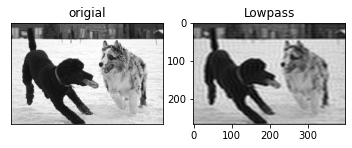

In [33]:
image = imageio.imread('dog-1.jpg').mean(2)/255.
plt.subplot(121),plt.imshow(image,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
rows,cols = image.shape
print(image.shape)


#################your code############
mask = np.zeros(image.shape,np.uint8)
mask[rows//2-30:rows//2+30,cols//2-30:cols//2+30] = 1
######################################


f1 = np.fft.fft2(image)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) 
img_new = np.fft.ifft2(f2shift)
img_new = np.abs(img_new)
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(122),plt.imshow(img_new,'gray'),plt.title('Lowpass')

There is also a band-pass filter formed by combining parts of high-pass and low-pass into a template. This can be useful in some situations. It is better to experiment with an ideal band-pass filter. Please make the band-pass filter yourself:(2 points)

(265, 400)


(<AxesSubplot:title={'center':'Bandpass'}>,
 Text(0.5, 1.0, 'Bandpass'))

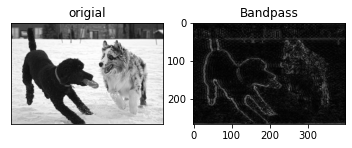

In [34]:
image = imageio.imread('dog-1.jpg').mean(2)/255.
plt.subplot(121),plt.imshow(image,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])

rows,cols = image.shape
print(image.shape)

#################your code############
mask_high_pass = np.ones(image.shape,np.uint8)
mask_high_pass[rows//2-30:rows//2+30,cols//2-30:cols//2+30] = 0

mask_low_pass = np.zeros(image.shape,np.uint8)
mask_low_pass[30:-30,30:-30] = 1

mask = mask_high_pass & mask_low_pass
######################################

f1 = np.fft.fft2(image)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift)
img_new = np.fft.ifft2(f2shift)
img_new = np.abs(img_new)
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(122),plt.imshow(img_new,'gray'),plt.title('Bandpass')

Now that you have completed the above experiment, please analyze why high-pass and low-pass filtering in the frequency domain will produce such results on the image.

#your results#

The low-frequency part of the image contains more critical information in the time domain, which mainly includes the areas of continuous color in the original image, while the high-frequency part contains less critical information in the time domain, which mainly includes the edge information in the original image. Therefore, after high-pass filtering, only edge information can be recovered, while after low-pass filtering, a image that is visually close to the original image can be recovered.
